Import Libraries

In [23]:
import numpy as np 
import pandas as pd  
import numpy as np
import math
import  matplotlib.pyplot  as  plt 
import seaborn as sns
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
#% matplotlib inline

In [24]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

Exploratory Data Analysis

In [25]:
"""_
For all new users we have saved their different coordinates and their average speed_
for our model to be more intelligent, it needs more data. Reason why we have several users 

    """

'_\nFor all new users we have saved their different coordinates and their average speed_\nfor our model to be more intelligent, it needs more data. Reason why we have several users \n\n    '

In [26]:
df1 = pd.read_excel((r'user1Datasets.xlsx'))
df2 = pd.read_excel((r'user2Datasets.xlsx'))
df3 = pd.read_excel((r'user3Datasets.xlsx'))
df4 = pd.read_excel((r'user4Datasets.xlsx'))
#df5 = pd.read_excel((r'user5Datasets.xlsx'))

## concatenating  of the different users' dataframes along rows
df = pd.concat([df1, df2, df3, df4], axis=0)



In [27]:
df.head(10)

,latitudeStart,longitudeStart,latitudeEnd,longitudeEnd,averageSpeed
0,51.452831,7.249331,51.429795,6.786755,3.04
1,51.452831,7.249327,51.429783,6.786729,5.14
2,51.452826,7.249328,51.429749,6.786717,7.14
3,51.452824,7.249328,51.429746,6.786700,1.49
4,51.452824,7.249319,51.429757,6.786722,1.99
5,51.452827,7.249324,51.429761,6.786727,2.49
6,51.452827,7.249324,51.429737,6.786676,2.99
7,51.452827,7.249320,51.429735,6.786676,3.49
8,51.452829,7.249322,51.429734,6.786676,3.99
9,51.452829,7.249322,51.429737,6.786676,4.49


In [28]:
df.shape

(704, 5)

In [29]:
print(df.describe().round(2).T)

                count   mean   std    min    25%    50%    75%    max
latitudeStart   704.0  51.47  0.04  51.43  51.45  51.45  51.51  51.53
longitudeStart  704.0   7.21  0.25   6.79   7.25   7.25   7.42   7.42
latitudeEnd     704.0  51.47  0.04  51.43  51.45  51.45  51.51  51.53
longitudeEnd    704.0   7.21  0.25   6.79   7.25   7.25   7.42   7.42
averageSpeed    704.0   4.71  2.15   1.23   3.39   4.37   5.40  13.15


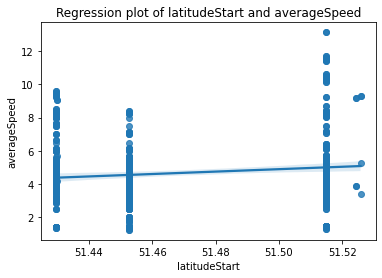

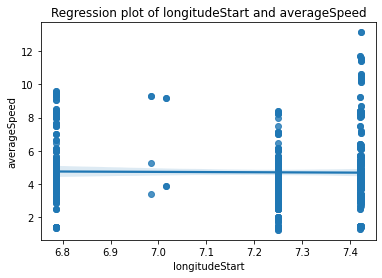

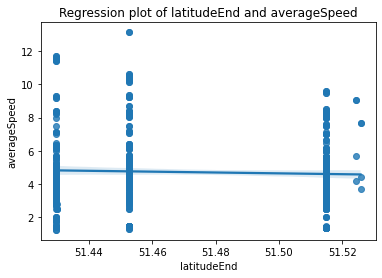

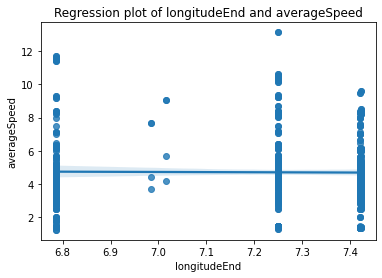

In [30]:
#This time, we will use Seaborn, an extension of Matplotlib which Pandas uses under the hood when plotting:
import seaborn as sns # Convention alias for Seaborn

variables = ['latitudeStart', 'longitudeStart', 'latitudeEnd','longitudeEnd']

for var in variables:
    plt.figure() # Creating a rectangle (figure) for each plot
    # Regression Plot also by default includes
    # best-fitting regression line
    # which can be turned off via `fit_reg=False`
    sns.regplot(x=var, y='averageSpeed', data=df).set(title=f'Regression plot of {var} and averageSpeed');

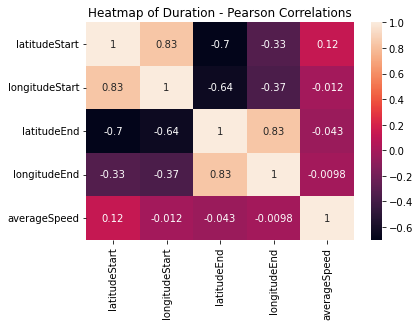

In [31]:
correlations = df.corr()
# annot=True displays the correlation values
sns.heatmap(correlations, annot=True).set(title='Heatmap of Duration - Pearson Correlations');

Preparing the Data

In [32]:

y = df['averageSpeed']
X = df[['latitudeStart', 'longitudeStart',
       'latitudeEnd', 'longitudeEnd']]

In [33]:
#To be able to have the same results, or reproducible results, we define a constant called SEED
SEED = 42

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=SEED)

#Training the Model

In [35]:

X.shape 

(704, 4)

In [36]:
#we need to fit the line to our data, we will do that by using the .fit() method
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [37]:
#After fitting the model and finding our optimal solution, we also look at the intercept:
regressor.intercept_


-1943.0182223040017

In [38]:
#And at the coefficients of the features
regressor.coef_

array([31.17136521, -3.58876925,  7.25417556, -0.58591778])

In [39]:
#Those four values are the coefficients for each of our features in the same order as we have them in our X data.
feature_names = X.columns
feature_names


Index(['latitudeStart', 'longitudeStart', 'latitudeEnd', 'longitudeEnd'], dtype='object')

In [40]:
#we assign our column names to a feature_names variable, and our coefficients to a model_coefficients variable. After that, we create a dataframe with our features as an index and our coefficients as column values called coefficients_df

feature_names = X.columns
model_coefficients = regressor.coef_

coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coefficient value'])
print(coefficients_df)

                Coefficient value
latitudeStart           31.171365
longitudeStart          -3.588769
latitudeEnd              7.254176
longitudeEnd            -0.585918


#Making Predictions with the Regression Model

In [41]:
#The y_pred variable contains all the predicted values for the input values in the X_test
y_pred = regressor.predict(X_test)

In [42]:
#Now, that we have our test predictions, we can better compare them with the actual output values for X_test by organizing them in a DataFrameformat

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)


     Actual  Predicted
120   4.490   5.136279
81    8.330   5.110497
77    3.900   5.111868
32    4.860   4.169658
142   4.390   5.135053
..      ...        ...
108   3.360   5.136354
80    1.384   5.110526
56    8.300   4.169449
142   2.520   5.135053
167   3.088   5.239599

[141 rows x 2 columns]


Evaluating the Model

In [43]:

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 1.67
Mean squared error: 4.61
Root mean squared error: 2.15


In [44]:
##We can see that the value of the RMSE is 2.08, 
# which means that our model might get its prediction wrong by adding or subtracting 2.5 from the actual value. 
# It would be better to have this error closer to 0, and 2.08 is a small number - 
# this indicates that our model might be predicting very well.